In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:

file_path = "../Audio/Data"
print(os.listdir(f'{file_path}/genres_original'))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
sound, sample_rate = librosa.load(f'{file_path}/genres_original/classical/classical.00003.wav')

In [4]:
print('vibration sequence:', sound)
array_len =sound.shape
print('sound shape:', array_len)
print('Sample Rate (Hz):',sample_rate)

print('Check Len of Audio:', array_len[0]/sample_rate)

vibration sequence: [-0.0083313  -0.02258301 -0.04367065 ...  0.00463867 -0.00314331
 -0.00640869]
sound shape: (661794,)
Sample Rate (Hz): 22050
Check Len of Audio: 30.013333333333332


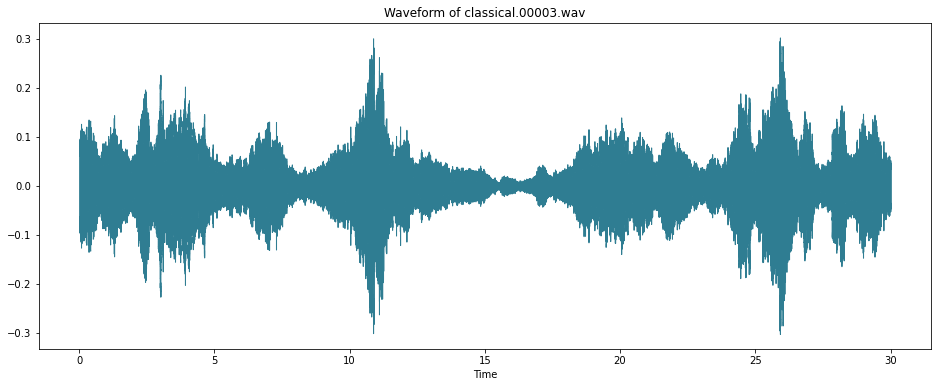

In [5]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=sound, sr=sample_rate, color="#2f7d92ff")
plt.title("Waveform of classical.00003.wav", fontsize=12)  # Classical music are highly dynamic.
plt.show()

In [6]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(sound, n_fft=n_fft, hop_length=hop_length))

print('Shape of D object:', np.shape(D))
print('\nD:-\n', D)

Shape of D object: (1025, 1293)

D:-
 [[9.7630739e-01 4.3563733e-01 2.6253659e-01 ... 1.9574383e-02
  2.8536952e-01 1.1147991e+00]
 [9.3984210e-01 1.1641904e+00 6.5318769e-01 ... 4.1530213e-01
  4.1666111e-01 1.2162576e+00]
 [6.3040984e-01 1.0830315e+00 1.5844011e+00 ... 5.5874109e-01
  7.4106574e-01 1.0394166e+00]
 ...
 [9.2585682e-04 3.5507523e-04 1.7256488e-04 ... 5.8354395e-05
  2.2121928e-04 2.1748159e-03]
 [8.0592977e-04 4.4423103e-04 2.5772859e-04 ... 1.9073405e-04
  3.0186397e-04 2.3431848e-03]
 [7.7848951e-04 2.3444227e-04 3.1631842e-04 ... 5.0587044e-04
  9.4339927e-04 2.7791236e-03]]


Text(0.5, 1.0, 'Harmonic + Percussive')

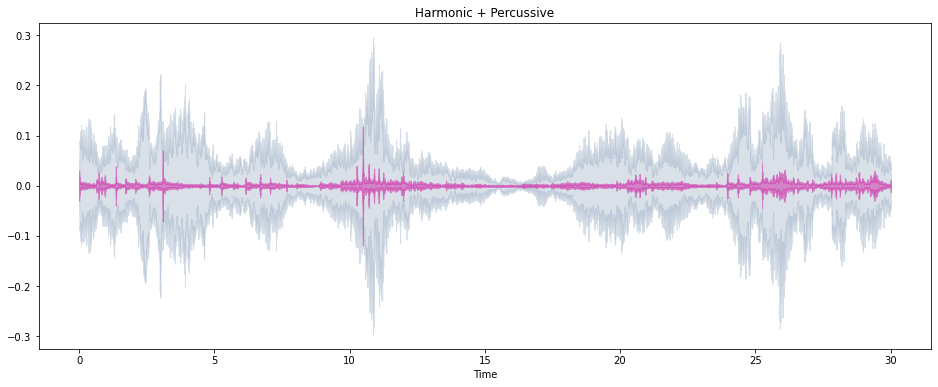

In [14]:
y_harm, y_perc = librosa.effects.hpss(sound)
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y_harm, sr=sample_rate, color="#6885a7ff", alpha=0.25);
librosa.display.waveshow(y_perc, sr=sample_rate, color='#cf27a7ff', alpha=0.5);
plt.title('Harmonic + Percussive')
# ax = plt.axes()
# ax.set(title='Harmonic + Percussive');

In [15]:
# Detecting the tempo of the track

tempo = librosa.beat.tempo(y=sound, sr=sample_rate)
print(tempo)

[135.99917763]


In [17]:
# Importing 30 secs csv file.
data = pd.read_csv(f'{file_path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [24]:
data = data.iloc[0:,1:]
Y = data['label']
X = data.drop('label', axis=1)